<a href="https://colab.research.google.com/github/Shalha-Mucha18/ML-Project/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary libaries


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

Load data from dataset into dataframe

In [9]:
df=pd.read_csv("/content/diabetes.csv")
#printing the first 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
#number of rows and cloumns int this dataset
df.shape

(768, 9)

In [11]:
#general information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
#getting statistical measure of data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
#check na values and duplicate data
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
print(f'Total duplicated data {df.duplicated().sum()}')

Total duplicated data 0


Data Visualization



Correlation

In [15]:
import plotly.express as px
corr=df.corr()
fig=px.imshow(corr)
fig.show()


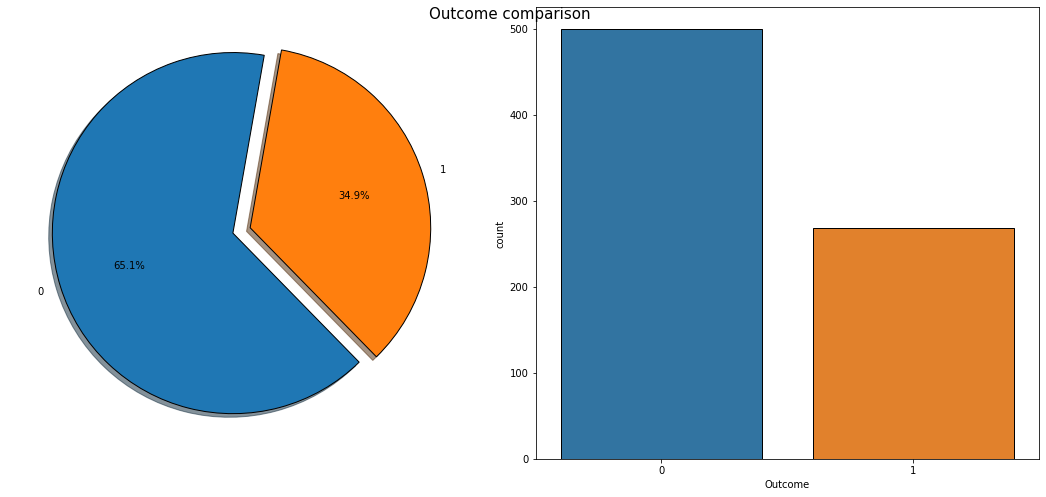

In [16]:
fig,(ax1,ax2)=plt.subplots(ncols=2,nrows=1,figsize=(15,7))
fig.suptitle('Outcome comparison\n',fontsize=15)
ax1.pie(df['Outcome'].value_counts().values,labels=df['Outcome'].value_counts().index,shadow=True,wedgeprops = {'edgecolor': 'black'},explode=[0.0,0.1],autopct='%1.1f%%',
        startangle=80)
sns.countplot(ax=ax2, data=df, x='Outcome',edgecolor='black')
plt.tight_layout()


In [17]:
df['Outcome'].value_counts().index

Int64Index([0, 1], dtype='int64')

In [18]:
#finding the affects of age on the other features
from plotly.subplots import make_subplots
mean_df=pd.DataFrame({"Age":sorted(df['Age'].unique())})
for column in df.columns[:-2]:
  grouper=df.groupby('Age')
  col_name='Mean' + column
  mean_df[col_name]=grouper[column].mean().values

In [19]:
mean_df.head()

,Age,MeanPregnancies,MeanGlucose,MeanBloodPressure,MeanSkinThickness,MeanInsulin,MeanBMI,MeanDiabetesPedigreeFunction
0,21,1.079365,108.317460,65.936508,19.349206,73.634921,27.817460,0.433825
1,22,1.555556,108.208333,63.722222,20.486111,74.486111,29.509722,0.430625
2,23,1.578947,111.578947,64.315789,22.368421,118.026316,31.502632,0.438579
3,24,1.891304,117.891304,64.956522,25.934783,88.021739,32.569565,0.393565
4,25,1.770833,110.083333,59.666667,23.958333,82.895833,31.943750,0.600500


In [20]:
df.columns[:-2]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction'],
      dtype='object')

In [21]:
import plotly.graph_objs as go
fig = make_subplots(cols=2, rows=4, subplot_titles=mean_df.columns[1:])

ncol = 1
nrow = 1
for i, column in zip(range(1,8), mean_df.columns[1:]):
    if i % 2 == 0:
        fig.add_trace(go.Line(x=mean_df.Age, y=mean_df[column]), col=ncol, row=nrow)
        nrow += 1
        ncol = 0
    else:
        fig.add_trace(go.Line(x=mean_df.Age, y=mean_df[column]), col=ncol, row=nrow)
    ncol += 1

fig.update_layout(height=1000)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [22]:
fig = px.violin(df, x='Outcome', y='Age', box=True)
fig.show()

In [23]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [24]:
#separate the data and labels
x=df.drop(columns='Outcome',axis=1)
y=df['Outcome']

In [25]:
print(x)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [26]:
#data standarization
scaler=StandardScaler()
scaler.fit(x)

StandardScaler()

In [27]:
standarized_data=scaler.transform(x)
print(standarized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [28]:
x=standarized_data
y=df['Outcome']


In [29]:
print(x)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [30]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [31]:
#spliting the data into test and train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

In [32]:
#printing the shape
print(x_train.shape,x_test.shape)

(614, 8) (154, 8)


Training the model with SVM

In [33]:
cls=svm.SVC(kernel='linear')

In [34]:
cls.fit(x,y)

SVC(kernel='linear')

Model Evaluation

In [35]:
#accuracy score on the training data
predict_x_train=cls.predict(x_train)
print("Accuracy score on the training data",accuracy_score(y_train,predict_x_train))

Accuracy score on the training data 0.7736156351791531


In [36]:
#accuracy score on the test data
predict_x_test=cls.predict(x_test)
print("Accuracy score on the test data",accuracy_score(y_test,predict_x_test))

Accuracy score on the test data 0.7727272727272727


Making a predictive syste,

In [40]:
data=(1,50,61,20,100,22.6,0.991,28)
modified_data=np.asarray(data)
reshaped_data=modified_data.reshape(1,-1)
std_data=scaler.transform(reshaped_data)
predict_std_data=cls.predict(std_data)
if predict_std_data[0]==0:
  print("No diabetes")
else:
  print("Diabetes")

No diabetes


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

